In [1]:
include("../src/Regression/linear_regression.jl")
include("../src/Regression/poisson_regression.jl")
include("../src/Basic/mean.jl")
include("../src/Basic/variance.jl")
include("../src/Distribution/poisson.jl")
include("../src/Type/method_parameter.jl")
using Plots

Poisson regression's parameter = [1.9806194573106057, 0.530605589426544]


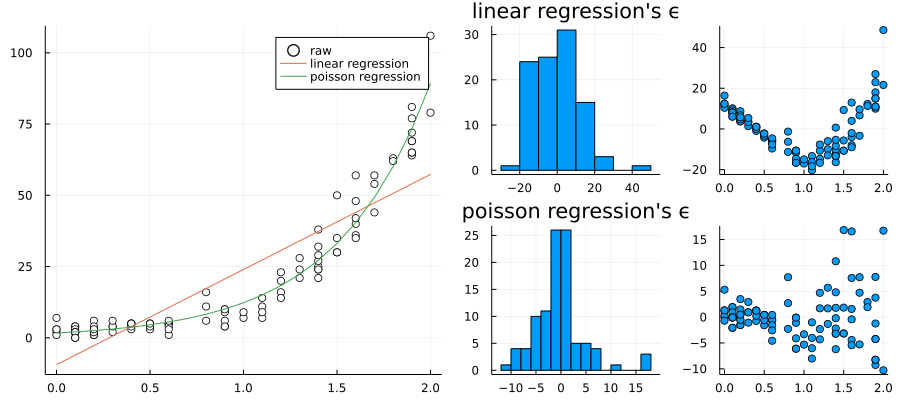

In [2]:
let
    N = 100
    λ(x) = exp(2x + 0.5)
    Y = zeros(N)
    X = ones(N,2)
    # ポアソン分布に従う乱数を生成
    for i in 1:N
        x = rand(0.0:0.1:2.0)
        X[i,1] = x
        Y[i] = poisson_inv(λ(X[i,1]), rand()) 
    end

    data_plot = scatter(X[:,1], Y, color=:white, label="raw")
    
    # 線形回帰
    w_lr = linear_regression(X, Y)
    plot!(0:0.1:2, x -> w_lr[1]*x+w_lr[2], label="linear regression")
    # ポアソン回帰
    w_pr = poisson_regression(X,Y, GD(zeros(2), t->0.001/sqrt(1+t), 1e-4, 1000))
    plot!(0:0.1:2, x -> exp(w_pr[1]*x+w_pr[2]), label="poisson regression")
    println("Poisson regression's parameter = $w_pr")

    ϵ_lr = Y - X*w_lr
    elr_hist = histogram(ϵ_lr, title="linear regression's ϵ", legend=:none)
    elr_plot = scatter(X[:,1], ϵ_lr, legend=:none)
    ϵ_pr = Y - map(exp, X*w_pr)
    epr_hist = histogram(ϵ_pr, title="poisson regression's ϵ", legend=:none)
    epr_plot = scatter(X[:,1], ϵ_pr, legend=:none)
    e_plots = plot(elr_hist, elr_plot, epr_hist, epr_plot)
    plot(data_plot, e_plots, size=(900,400))
end